In [1]:
import numpy as np

from ge.classify import read_node_label, Classifier
from ge import LINE
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import networkx as nx
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

In [4]:
def evaluate_embeddings(embeddings):
    X, Y = read_node_label('../data/wiki/wiki_labels.txt')
    tr_frac = 0.8
    print("Training classifier using {:.2f}% nodes...".format(
        tr_frac * 100))
    clf = Classifier(embeddings=embeddings, clf=LogisticRegression())
    clf.split_train_evaluate(X, Y, tr_frac)


def plot_embeddings(embeddings,):
    X, Y = read_node_label('../data/wiki/wiki_labels.txt')

    emb_list = []
    for k in X:
        emb_list.append(embeddings[k])
    emb_list = np.array(emb_list)

    model = TSNE(n_components=2)
    node_pos = model.fit_transform(emb_list)

    color_idx = {}
    for i in range(len(X)):
        color_idx.setdefault(Y[i][0], [])
        color_idx[Y[i][0]].append(i)

    for c, idx in color_idx.items():
        plt.scatter(node_pos[idx, 0], node_pos[idx, 1], label=c)
    plt.legend()
    plt.show()

In [2]:
G = nx.read_edgelist('../data/wiki/Wiki_edgelist.txt',
                        create_using=nx.DiGraph(), nodetype=None, data=[('weight', int)])

model = LINE(G, embedding_size=128, order='second')
model.train(batch_size=1024, epochs=50, verbose=2)
embeddings = model.get_embeddings()
embeddings

Epoch 1/50
97/97 - 1s - loss: 0.6931
Epoch 2/50
97/97 - 0s - loss: 0.6914
Epoch 3/50
97/97 - 0s - loss: 0.6817
Epoch 4/50
97/97 - 1s - loss: 0.6278
Epoch 5/50
97/97 - 0s - loss: 0.5116
Epoch 6/50
97/97 - 0s - loss: 0.4215
Epoch 7/50
97/97 - 0s - loss: 0.3862
Epoch 8/50
97/97 - 0s - loss: 0.3448
Epoch 9/50
97/97 - 0s - loss: 0.3192
Epoch 10/50
97/97 - 0s - loss: 0.2927
Epoch 11/50
97/97 - 0s - loss: 0.2702
Epoch 12/50
97/97 - 1s - loss: 0.2472
Epoch 13/50
97/97 - 0s - loss: 0.2342
Epoch 14/50
97/97 - 0s - loss: 0.2074
Epoch 15/50
97/97 - 0s - loss: 0.1912
Epoch 16/50
97/97 - 0s - loss: 0.1765
Epoch 17/50
97/97 - 0s - loss: 0.1618
Epoch 18/50
97/97 - 0s - loss: 0.1512
Epoch 19/50
97/97 - 0s - loss: 0.1429
Epoch 20/50
97/97 - 1s - loss: 0.1297
Epoch 21/50
97/97 - 0s - loss: 0.1205
Epoch 22/50
97/97 - 1s - loss: 0.1147
Epoch 23/50
97/97 - 0s - loss: 0.1072
Epoch 24/50
97/97 - 0s - loss: 0.1006
Epoch 25/50
97/97 - 1s - loss: 0.0974
Epoch 26/50
97/97 - 1s - loss: 0.0901
Epoch 27/50
97/97 - 1

{'1397': array([-6.77893534e-02,  6.79373860e-01,  5.12491405e-01, -4.05917138e-01,
        -2.36765593e-01, -1.83405399e-01, -4.45113927e-01, -4.55456860e-02,
        -1.55600518e-01,  4.65127915e-01,  9.46175754e-02, -8.06841314e-01,
         1.64252564e-01,  4.66271788e-02, -5.63547552e-01, -1.47493348e-01,
        -1.28495440e-01, -3.21740568e-01,  2.00014547e-01,  4.95577417e-03,
         4.74716630e-03,  3.71637702e-01,  1.75695658e-01,  2.56659240e-01,
         2.74577171e-01, -2.42545605e-01, -1.03617273e-01, -1.82657927e-01,
        -8.54127929e-02,  3.41030777e-01,  2.89079309e-01,  3.04368317e-01,
         4.85636234e-01, -1.51987653e-04,  2.47080877e-01,  3.02553117e-01,
        -4.22243804e-01,  2.69969940e-01,  1.21853672e-01,  2.43785203e-01,
         3.29190671e-01,  8.23515952e-02, -3.70636545e-02, -2.47855097e-01,
         3.96968424e-01,  7.11270347e-02, -3.68507415e-01,  1.12290815e-01,
         2.12616865e-02,  1.32103801e-01, -4.94169384e-01,  7.79899657e-01,
    

In [5]:
evaluate_embeddings(embeddings)

Training classifier using 80.00% nodes...
-------------------
{'micro': 0.6174636174636174, 'macro': 0.47524365909508814, 'samples': 0.6174636174636174, 'weighted': 0.6088837844375351, 'acc': 0.6174636174636174}


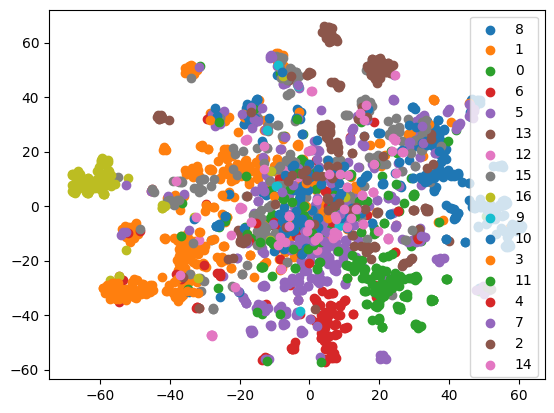

In [6]:
plot_embeddings(embeddings)